In [1]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [117]:
def parse_node(s):
    x,y = s.split('\t')[:2]
    x,y = tuple(_x.replace('"','') for _x in json.loads(x)), json.loads(y)
    return x,y

edges = defaultdict(int)
with open('industry_map_reduce.txt', 'r') as graph_file:
    for line in graph_file.readlines():
        _node, _w = parse_node(line)
        edges[tuple(sorted(_node))] += _w

edges

defaultdict(int,
            {('airlines/aviation', 'health'): 23,
             ('airlines/aviation', 'leisure'): 260,
             ('airlines/aviation', 'airlines/aviation'): 1149,
             ('airlines/aviation', 'alternative dispute resolution'): 3,
             ('airlines/aviation', 'alternative medicine'): 2,
             ('airlines/aviation', 'apparel & fashion'): 14,
             ('airlines/aviation', 'architecture & planning'): 30,
             ('airlines/aviation', 'arts and crafts'): 7,
             ('airlines/aviation', 'aviation & aerospace'): 1140,
             ('airlines/aviation', 'broadcast media'): 15,
             ('airlines/aviation', 'building materials'): 25,
             ('airlines/aviation', 'business supplies and equipment'): 18,
             ('airlines/aviation', 'capital markets'): 2,
             ('airlines/aviation', 'civic & social organization'): 21,
             ('airlines/aviation', 'civil engineering'): 13,
             ('airlines/aviation', 'commerci

In [57]:
graph = nx.Graph()

for edge in edges.items():
    graph.add_edge(edge[0][0], edge[0][1], weight=edge[1])

graph.nodes

NodeView(('airlines/aviation', 'health', 'leisure', 'alternative dispute resolution', 'alternative medicine', 'apparel & fashion', 'architecture & planning', 'arts and crafts', 'aviation & aerospace', 'broadcast media', 'building materials', 'business supplies and equipment', 'capital markets', 'civic & social organization', 'civil engineering', 'commercial real estate', 'computer games', 'computer hardware', 'computer networking', 'computer software', 'consumer electronics', 'consumer goods', 'consumer services', 'defense & space', 'e-learning', 'education management', 'electrical/electronic manufacturing', 'environmental services', 'events services', 'executive office', 'facilities services', 'financial services', 'fine art', 'food & beverages', 'food production', 'fund-raising', 'government administration', 'government relations', 'graphic design', 'higher education', 'hospital & health care', 'human resources', 'import and export', 'individual & family services', 'industrial automa

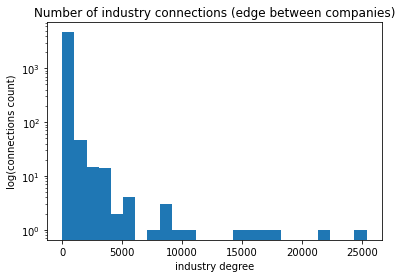

In [61]:
weights = edges.values()
plt.figure()
plt.title('Number of industry connections (edge between companies)')
plt.ylabel('log(connections count)')
plt.xlabel('industry degree')
plt.hist(weights, bins=25)
plt.yscale('log')
plt.show()

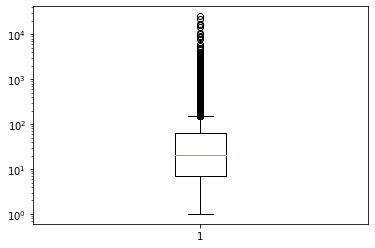

In [62]:
plt.boxplot(weights)
plt.yscale('log')
plt.show()

In [64]:
num_connected_components = len(list(nx.connected_components(graph)))
print('Number of connected components:', num_connected_components)

num_nodes = graph.number_of_nodes()
print('Number of nodes:', num_nodes)

num_edges = graph.number_of_edges()
print('Number of edges:', num_edges)

mean_degree = np.mean([d for n,d in graph.degree()])
print('Mean node degree:', mean_degree)

Number of connected components: 1
Number of nodes: 100
Number of edges: 4744
Mean node degree: 94.88


In [66]:
graph['airlines/aviation']

AtlasView({'health': {'weight': 23}, 'leisure': {'weight': 260}, 'airlines/aviation': {'weight': 1149}, 'alternative dispute resolution': {'weight': 3}, 'alternative medicine': {'weight': 2}, 'apparel & fashion': {'weight': 14}, 'architecture & planning': {'weight': 30}, 'arts and crafts': {'weight': 7}, 'aviation & aerospace': {'weight': 1140}, 'broadcast media': {'weight': 15}, 'building materials': {'weight': 25}, 'business supplies and equipment': {'weight': 18}, 'capital markets': {'weight': 2}, 'civic & social organization': {'weight': 21}, 'civil engineering': {'weight': 13}, 'commercial real estate': {'weight': 6}, 'computer games': {'weight': 7}, 'computer hardware': {'weight': 8}, 'computer networking': {'weight': 2}, 'computer software': {'weight': 72}, 'consumer electronics': {'weight': 17}, 'consumer goods': {'weight': 32}, 'consumer services': {'weight': 46}, 'defense & space': {'weight': 65}, 'e-learning': {'weight': 3}, 'education management': {'weight': 41}, 'electrica

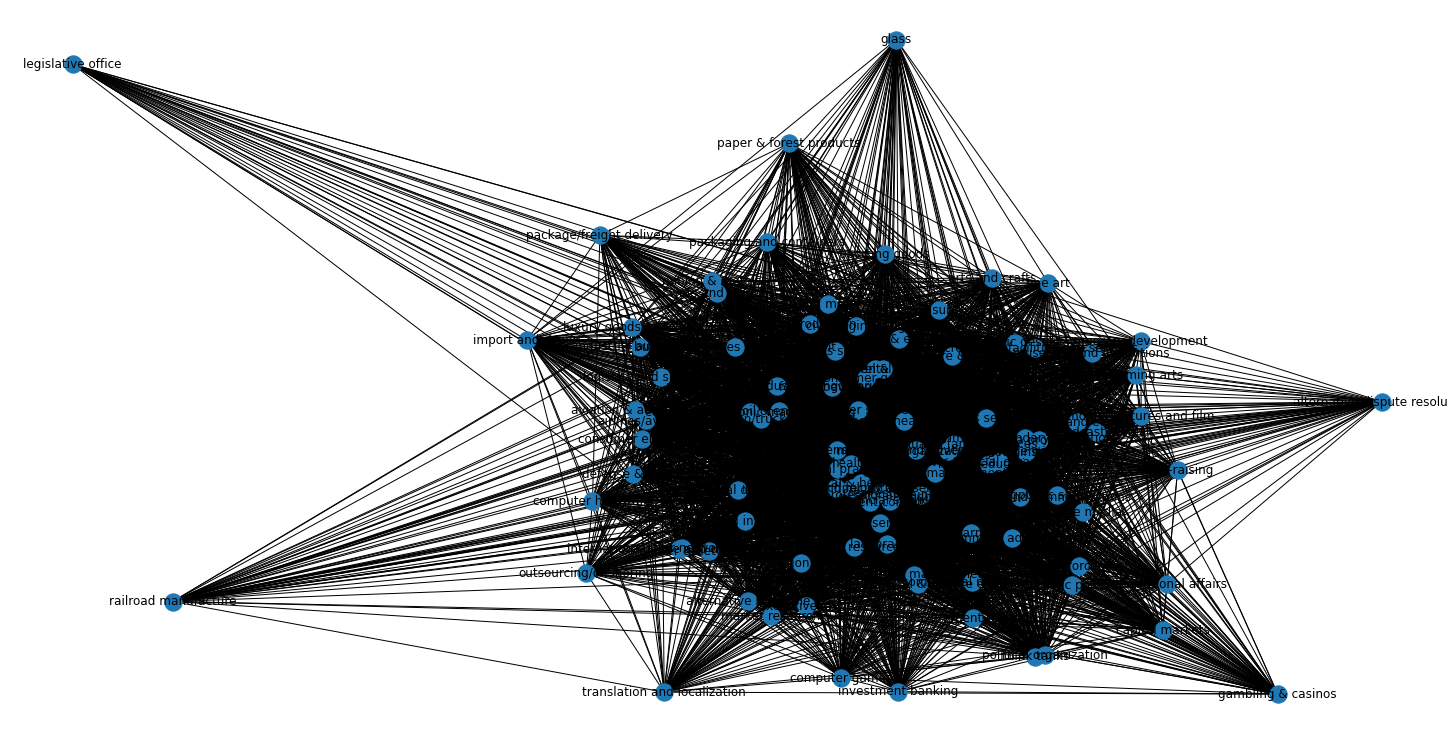

In [67]:
plt.figure(figsize=(20,10))
nx.draw(graph, with_labels=True, )
plt.savefig('industry_map.png')

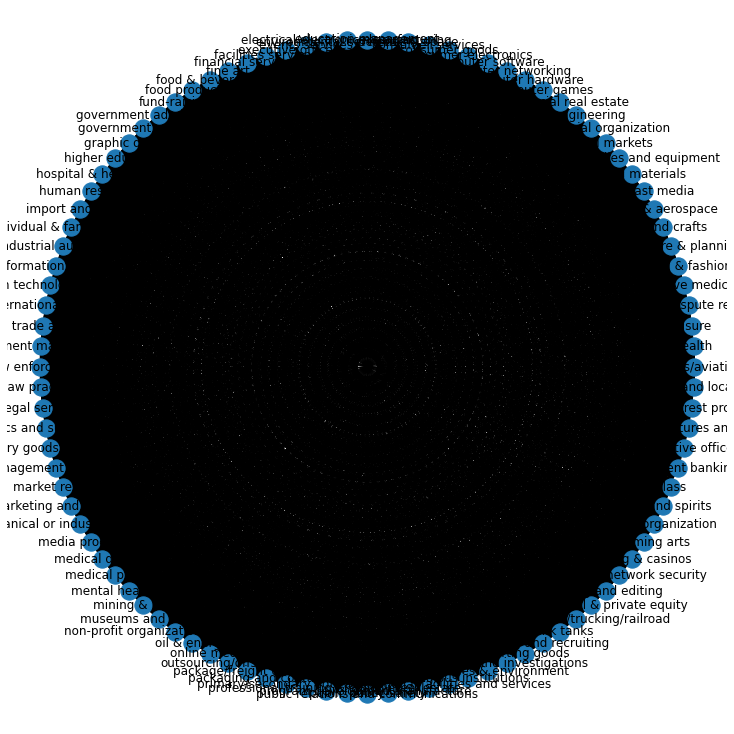

In [68]:
plt.figure(figsize=(10,10))
nx.draw_circular(graph, with_labels=True)

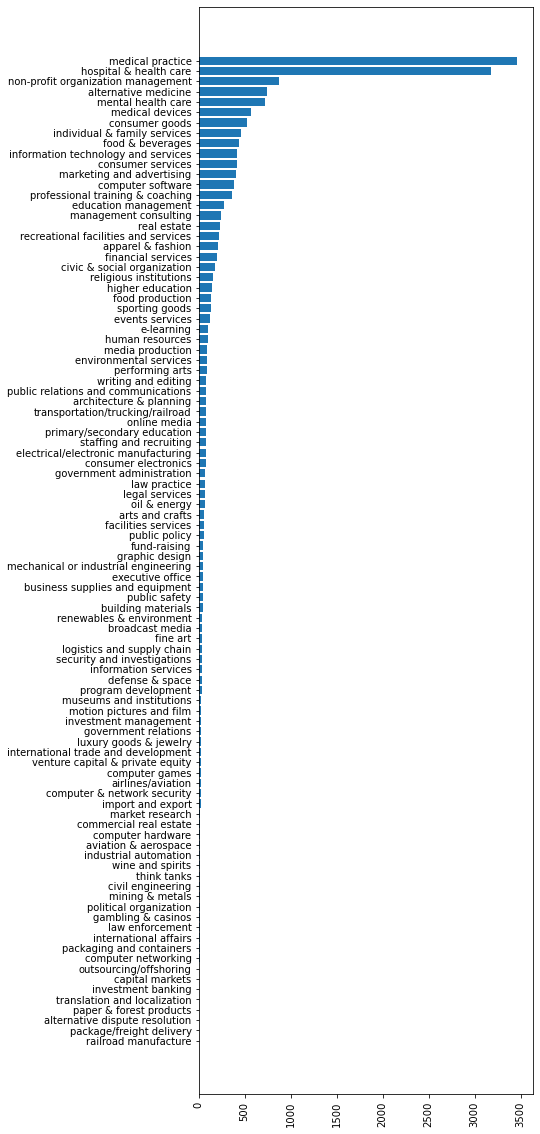

In [110]:
n = 'health'
w = []
for neighbor in graph[n]:
    w.append((neighbor, graph[n][neighbor]['weight']))

w = sorted(w, key=lambda x:x[1])
plt.figure(figsize=(6,20))
plt.barh([x[0] for x in w], [x[1] for x in w])
plt.xticks(rotation=90)
plt.show()

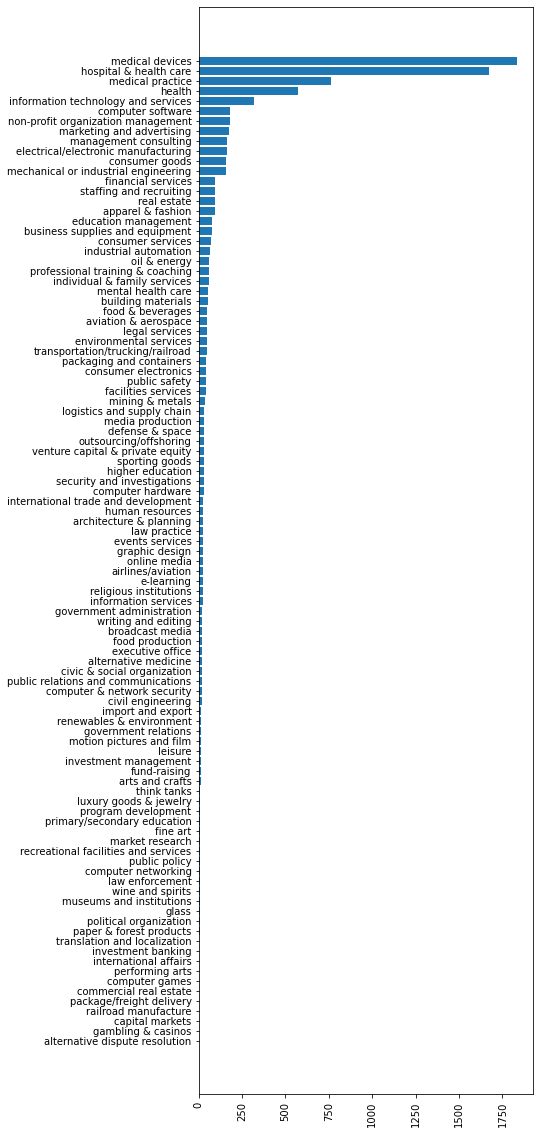

In [121]:
n = 'medical devices'
w = []
for neighbor in graph[n]:
    w.append((neighbor, graph[n][neighbor]['weight']))

w = sorted(w, key=lambda x:x[1])
plt.figure(figsize=(6,20))
plt.barh([x[0] for x in w], [x[1] for x in w])
plt.xticks(rotation=90)
plt.show()

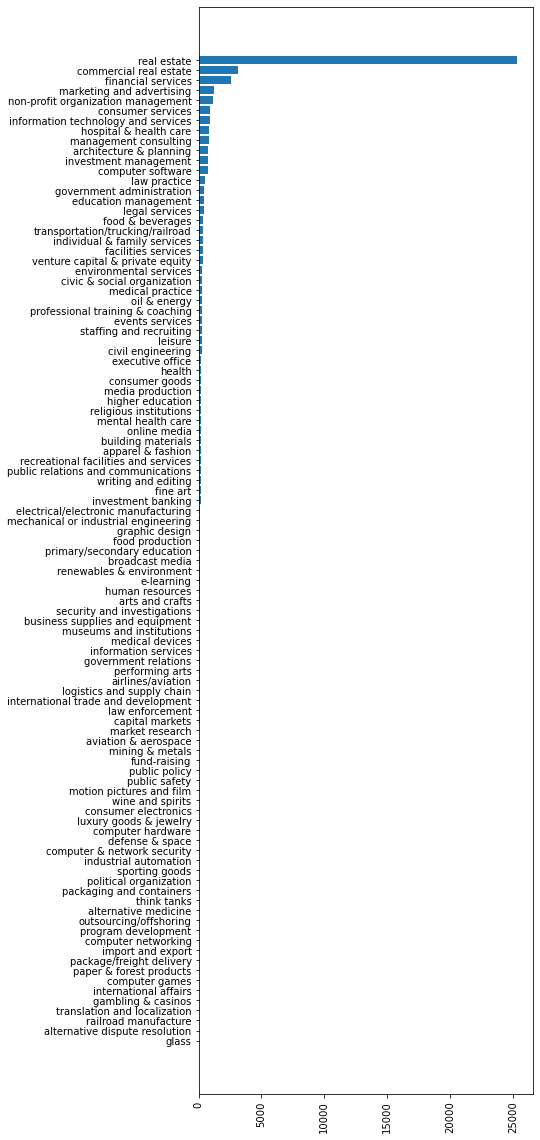

In [109]:
n = 'real estate'
w = []
for neighbor in graph[n]:
    w.append((neighbor, graph[n][neighbor]['weight']))

w = sorted(w, key=lambda x:x[1])
plt.figure(figsize=(6,20))
plt.barh([x[0] for x in w], [x[1] for x in w])
plt.xticks(rotation=90)
plt.show()

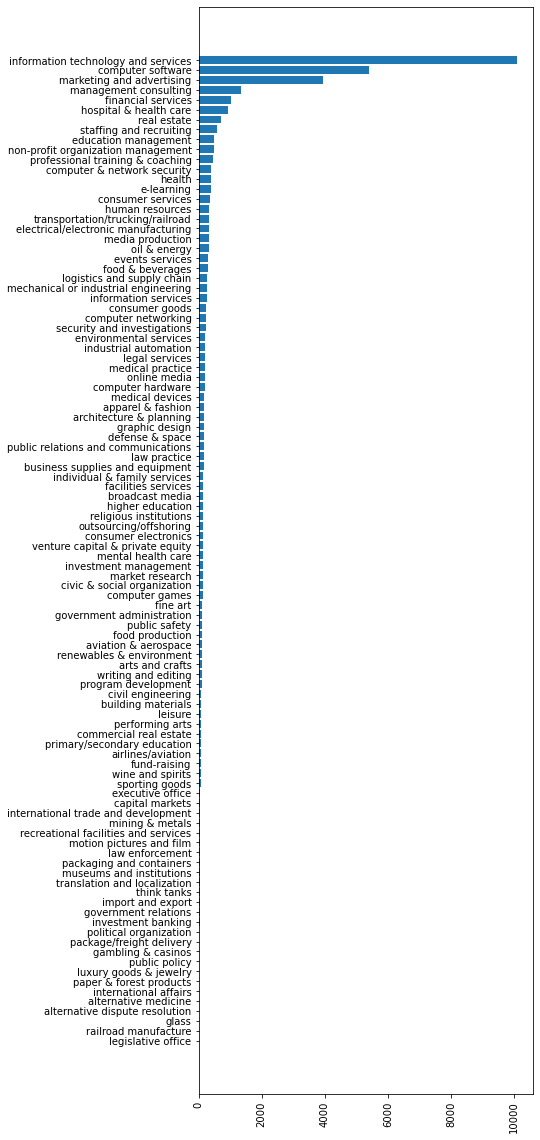

In [108]:
n = 'computer software'
w = []
for neighbor in graph[n]:
    w.append((neighbor, graph[n][neighbor]['weight']))

w = sorted(w, key=lambda x:x[1])
plt.figure(figsize=(6,20))
plt.barh([x[0] for x in w], [x[1] for x in w])
plt.xticks(rotation=90)
plt.show()

Filtering the edges, use only edges greater than Q1

In [9]:
weights_q1 = np.quantile(weights, 0.25)
weights_q1

4.0

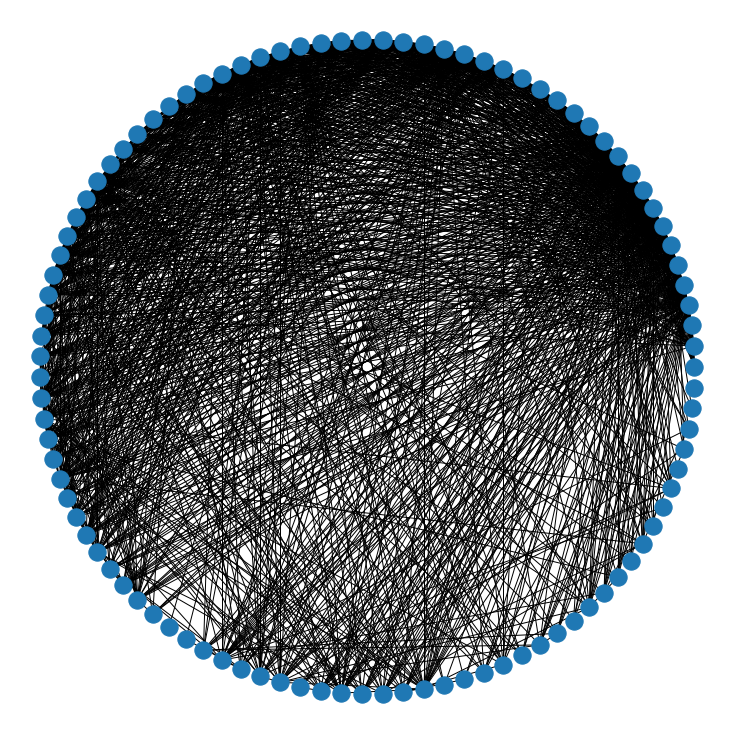

In [78]:
_graph = nx.Graph()

q = np.quantile(list(weights), 0.7)
for e in edges.items():
    if e[1] > q:
        _graph.add_edge(e[0][0], e[0][1], weight=e[1])

plt.figure(figsize=(10,10))
nx.draw_circular(_graph)

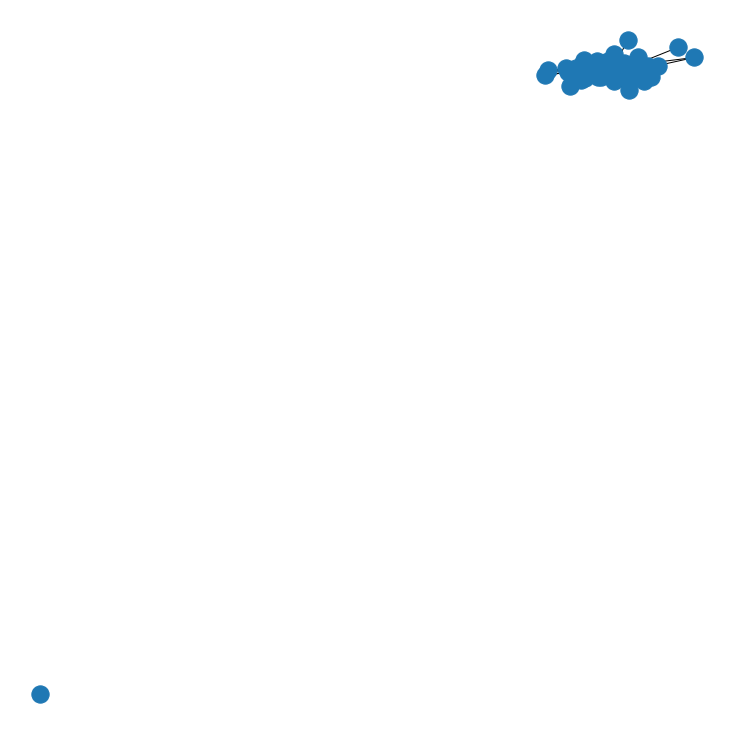

In [79]:
plt.figure(figsize=(10,10))
nx.draw(_graph)

In [43]:
ind = 'airlines/aviation'
s = []
for edge in edges:
    if ind in edge[0]:
        for e in edge[0]:
            if e != ind:
                s.append(e)

print(len(s))
print(len(set(s)))

179
96
